In [2]:
%load_ext autoreload
%autoreload 2

from datetime import date, datetime
import os
import numpy as np
import pandas as pd
import collections
import plotly.express as px

from tia.bbg import LocalTerminal

In [37]:
start_date = date(2001, 1, 1)
end_date = date.today()
resp = LocalTerminal.get_historical("NIFTY Index", ["PX_OPEN", "PX_HIGH", "PX_LOW", "PX_LAST"], start_date, end_date)
df = resp.as_frame()

dd_data = pd.DataFrame()
dd_data = dd_data.assign(close=df[("NIFTY Index", "PX_LAST")])
cummax = close.cummax()
dd = (1 - close / cummax)*-1
cummin = close.cummin()
du = close / cummin - 1
dd_data = dd_data.assign(drawdown=dd)
dd_data = dd_data.assign(drawup=du)

## Draawdown Study

In [38]:
import plotly.express as px
fig = px.histogram(dd_data, x="drawdown")
fig.show()

In [39]:
fig = px.histogram(dd_data, x="drawup")
fig.show()

## Fit distributions

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


{'power_law': powerlaw.Power_Law,
 'lognormal': powerlaw.Lognormal,
 'exponential': powerlaw.Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'lognormal_positive': powerlaw.Lognormal_Positive}

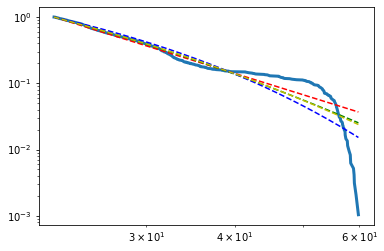

In [34]:
import powerlaw

# Fit the drawdown
fit = powerlaw.Fit(dd_data['drawdown']*-100)
fit.distribution_compare('power_law', 'lognormal')
fig = fit.plot_ccdf(linewidth=3, label='Empirical Data')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
fit.exponential.plot_ccdf(ax=fig, color='b', linestyle='--', label='exponential fit')
fit.truncated_power_law.plot_ccdf(ax=fig, color='y', linestyle='--', label='truncated power law')
fit.supported_distributions
#  .plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')